<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/2020_BiharElections/alliance/NDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 314 (delta 27), reused 0 (delta 0), pack-reused 231
Receiving objects: 100% (314/314), 17.32 MiB | 14.94 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [37]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-09-01"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#NDA")  
           
data1 = list(zip(text))
df1 = pd.DataFrame(data =data1, columns =["Tweet"])

df1.to_csv('NDA_Dataset.csv') 


RT @Satyanewshi: #ExitPolls Dainik Bhaskar , the largest Hindi Newspaper in India , gives simple majority to #NDA . Their network is more e…
<--------------------------------------------------->
1
I hope NDA Government will rule the Bihar once again!
I expect 124-136 seats for #NDA in the assembly election 2020… https://t.co/zpOmaFPPaE
<--------------------------------------------------->
2
@PMOIndia if you cant do anything, dont, #young #blood of #india watching #dirty #politics of #MumbaiPolice , if… https://t.co/0WiSbNT7Aw
<--------------------------------------------------->
3
@randm_indianguy Don't worry #NDA will win ✌️
#BiharElections2020 
#BiharWithNDA 
#BiharPolls https://t.co/7tcuIQ1g8R
<--------------------------------------------------->
4
❤️Alma Mater❤️ 

Physically so near (same city), yet so far...
- Courtesy the #ChinaVirus 👊 &amp; the associated curbs.… https://t.co/805e9O1G3d
<--------------------------------------------------->
5
RT @tarun_bhuyan: @desertfox61I @repu

# **Importing Libraries**

In [38]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **Cleaning** **NDADataset**

```
# length of the dataset
```



In [39]:
tweets_list = df1['Tweet'].tolist()
len(tweets_list)

720

# Removing duplicate tweets if any

In [40]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

372

```
No of duplicate tweets
```

In [41]:
df1['Tweet'].duplicated().sum()

348

In [42]:
df1 = df1.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df1.shape

(372, 1)

`Removed all the dupliactes`



# **Removing Emojis**


In [43]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df1['Processed_Tweet']=df1.Tweet.apply(remove_emoji)

From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet'[link text](https://)

In [44]:
count = 0
for i in df1['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df1.drop(df1.loc[df1['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

93

In [45]:
df1.shape

(279, 2)

In [46]:
df1['Processed_Tweet']

1      I hope NDA Government will rule the Bihar once...
2      @PMOIndia if you cant do anything, dont, #youn...
3      @randm_indianguy Don't worry #NDA will win ✌️\...
4      ❤️Alma Mater❤️ \n\nPhysically so near (same ci...
6      My Poll predictions \n#UPA ~ 126\n#NDA ~ 114\n...
                             ...                        
364    As these fine gentlemen of 139th course walk t...
367    prediction for #BiharElections2020 \n\n#NDA - ...
368    Yes, please go out and vote out #NDA !! https:...
369    Great Show by #NDA passing out parade 2020. Be...
370    Vote for bjp #BiharElections2020 #PMOIndia #ND...
Name: Processed_Tweet, Length: 279, dtype: object

# **Removing Username**

In [47]:
df1['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df1['Processed_Tweet']] #remove usernames
df1['Processed_Tweet']

1      I hope NDA Government will rule the Bihar once...
2        if you cant do anything, dont, #young #blood...
3        Don't worry #NDA will win ✌️\n#BiharElection...
4      ❤️Alma Mater❤️ \n\nPhysically so near (same ci...
6      My Poll predictions \n#UPA ~ 126\n#NDA ~ 114\n...
                             ...                        
364    As these fine gentlemen of 139th course walk t...
367    prediction for #BiharElections2020 \n\n#NDA - ...
368    Yes, please go out and vote out #NDA !! https:...
369    Great Show by #NDA passing out parade 2020. Be...
370    Vote for bjp #BiharElections2020 #PMOIndia #ND...
Name: Processed_Tweet, Length: 279, dtype: object

# **Removing URL if any**

In [48]:
df1['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df1['Processed_Tweet']] #Remove urls
df1['Processed_Tweet']

1      I hope NDA Government will rule the Bihar once...
2        if you cant do anything, dont, #young #blood...
3        Don't worry #NDA will win ✌️\n#BiharElection...
4      ❤️Alma Mater❤️ \n\nPhysically so near (same ci...
6      My Poll predictions \n#UPA ~ 126\n#NDA ~ 114\n...
                             ...                        
364    As these fine gentlemen of 139th course walk t...
367    prediction for #BiharElections2020 \n\n#NDA - ...
368             Yes, please go out and vote out #NDA !! 
369    Great Show by #NDA passing out parade 2020. Be...
370     Vote for bjp #BiharElections2020 #PMOIndia #NDA 
Name: Processed_Tweet, Length: 279, dtype: object

# **Removing Hashtags but keeping the word**

In [49]:
df1['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df1['Processed_Tweet']] # remove the # in #hashtag
df1['Processed_Tweet']

1      I hope NDA Government will rule the Bihar once...
2        if you cant do anything, dont, young blood o...
3        Don't worry NDA will win ✌️\nBiharElections2...
4      ❤️Alma Mater❤️ \n\nPhysically so near (same ci...
6      My Poll predictions \nUPA ~ 126\nNDA ~ 114\nRe...
                             ...                        
364    As these fine gentlemen of 139th course walk t...
367    prediction for BiharElections2020 \n\nNDA - 12...
368              Yes, please go out and vote out NDA !! 
369    Great Show by NDA passing out parade 2020. Bes...
370        Vote for bjp BiharElections2020 PMOIndia NDA 
Name: Processed_Tweet, Length: 279, dtype: object

# ***Using Preprocessor Library***

In [50]:
!pip install preprocessor

In [51]:
!pip install tweet-preprocessor

In [52]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df1['Processed_Tweet'] = [p.clean(i) for i in df1['Processed_Tweet']]
df1['Processed_Tweet']

1      I hope NDA Government will rule the Bihar once...
2      if you cant do anything, dont, young blood of ...
3      Don't worry NDA will win BiharElections2020 Bi...
4      Alma Mater Physically so near (same city), yet...
6      My Poll predictions UPA ~ NDA ~ Rest with others.
                             ...                        
364    As these fine gentlemen of th course walk thro...
367    prediction for BiharElections2020 NDA - (BJP /...
368               Yes, please go out and vote out NDA !!
369    Great Show by NDA passing out parade . Best wi...
370         Vote for bjp BiharElections2020 PMOIndia NDA
Name: Processed_Tweet, Length: 279, dtype: object

# **Removing any special characters, numbers, punctuations,etc..**

In [53]:
df1.Processed_Tweet = df1.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df1["Processed_Tweet"]

1      I hope NDA Government will rule the Bihar once...
2      if you cant do anything  dont  young blood of ...
3      Don t worry NDA will win BiharElections     Bi...
4      Alma Mater Physically so near  same city   yet...
6      My Poll predictions UPA   NDA   Rest with others 
                             ...                        
364    As these fine gentlemen of th course walk thro...
367    prediction for BiharElections     NDA    BJP  ...
368               Yes  please go out and vote out NDA   
369    Great Show by NDA passing out parade   Best wi...
370         Vote for bjp BiharElections     PMOIndia NDA
Name: Processed_Tweet, Length: 279, dtype: object

# **Converting to lowercase**

In [54]:
df1.Processed_Tweet = [low.lower() for low in df1.Processed_Tweet] #Converting into lower case
df1["Processed_Tweet"]

1      i hope nda government will rule the bihar once...
2      if you cant do anything  dont  young blood of ...
3      don t worry nda will win biharelections     bi...
4      alma mater physically so near  same city   yet...
6      my poll predictions upa   nda   rest with others 
                             ...                        
364    as these fine gentlemen of th course walk thro...
367    prediction for biharelections     nda    bjp  ...
368               yes  please go out and vote out nda   
369    great show by nda passing out parade   best wi...
370         vote for bjp biharelections     pmoindia nda
Name: Processed_Tweet, Length: 279, dtype: object

In [55]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

**`We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that`**

# **Removing Stop Words**

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['or', "don't", 'ours', "weren't", 'between', 'just', 'at', 'until', 'not', 'hasn', 'does', 'a', 'm', 'before', 'myself', "you've", 'these', 'who', "she's", 'itself', 'it', "shouldn't", "you're", 'if', 'them', 'she', "won't", 'how', 'what', 'aren', 'from', 'ma', 'needn', 'shan', 'against', 'its', 'himself', 'wouldn', 'do', 'y', 'won', "you'd", 'again', 'yourselves', 'hadn', 'me', 'our', 'for', 'with', 'yourself', 'into', 'above', 'further', 'my', 'then', 'whom', 'up', 'he', 'was', 'doesn', 'this', "wouldn't", "haven't", "hasn't", 'very', 'i', 'weren', "shan't", 'had', 'there', 'couldn', 'during', 'haven', 'your', 'such', 'you', 'now', 'be', 'as', "mightn't", 'were', 'too', 'same', 'has', 'when', 'their', 'the', 'off', 'didn', 'him', 'other', 'own', 'hers', 'after', 't', 'ain', "it's", 'll', 'down', "isn't", 'so', 'why', 'an', 'that', 'nor', 'we', 'by', 'will', 'o', 'both', 'can', 'doing', 'being', 'am', "wasn't", 'having', 'below', 'on', 'some', 'than', 'mustn', 'to', 'over', 'yours', 

In [58]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df1['Processed_Tweet']

1      hope nda government rule bihar expect seats nd...
2      cant anything dont young blood india watching ...
3      worry nda win biharelections biharwithnda biha...
4      alma mater physically near city yet far courte...
6                   poll predictions upa nda rest others
                             ...                        
364    fine gentlemen th course walk quarter deck par...
367    prediction biharelections nda bjp jd u mahagat...
368                               yes please go vote nda
369    great show nda passing parade best wishes youn...
370                 vote bjp biharelections pmoindia nda
Name: Processed_Tweet, Length: 279, dtype: object

# **Tokenizing**

In [59]:
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df1['Processed_Tweet']

1      [hope, nda, government, rule, bihar, expect, s...
2      [cant, anything, dont, young, blood, india, wa...
3      [worry, nda, win, biharelections, biharwithnda...
4      [alma, mater, physically, near, city, yet, far...
6            [poll, predictions, upa, nda, rest, others]
                             ...                        
364    [fine, gentlemen, th, course, walk, quarter, d...
367    [prediction, biharelections, nda, bjp, jd, u, ...
368                         [yes, please, go, vote, nda]
369    [great, show, nda, passing, parade, best, wish...
370           [vote, bjp, biharelections, pmoindia, nda]
Name: Processed_Tweet, Length: 279, dtype: object

# **Stemming**

In [60]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df1['Processed_Tweet']

1      [hope, nda, govern, rule, bihar, expect, seat,...
2      [cant, anyth, dont, young, blood, india, watch...
3      [worri, nda, win, biharelect, biharwithnda, bi...
4      [alma, mater, physic, near, citi, yet, far, co...
6                 [poll, predict, upa, nda, rest, other]
                             ...                        
364    [fine, gentlemen, th, cours, walk, quarter, de...
367    [predict, biharelect, nda, bjp, jd, u, mahagat...
368                           [ye, pleas, go, vote, nda]
369    [great, show, nda, pass, parad, best, wish, yo...
370               [vote, bjp, biharelect, pmoindia, nda]
Name: Processed_Tweet, Length: 279, dtype: object

In [61]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df1

,Tweet,Processed_Tweet
1,I hope NDA Government will rule the Bihar once...,"[hope, nda, govern, rule, bihar, expect, seat,..."
2,"@PMOIndia if you cant do anything, dont, #youn...","[cant, anyth, dont, young, blood, india, watch..."
3,@randm_indianguy Don't worry #NDA will win ✌️\...,"[worri, nda, win, biharelect, biharwithnda, bi..."
4,❤️Alma Mater❤️ \n\nPhysically so near (same ci...,"[alma, mater, physic, near, citi, yet, far, co..."
6,My Poll predictions \n#UPA ~ 126\n#NDA ~ 114\n...,"[poll, predict, upa, nda, rest, other]"
...,...,...
364,As these fine gentlemen of 139th course walk t...,"[fine, gentlemen, cours, walk, quarter, deck, ..."
367,prediction for #BiharElections2020 \n\n#NDA - ...,"[predict, biharelect, nda, bjp, mahagathbandha..."
368,"Yes, please go out and vote out #NDA !! https:...","[pleas, vote, nda]"
369,Great Show by #NDA passing out parade 2020. Be...,"[great, show, nda, pass, parad, best, wish, yo..."


In [62]:
texts = []
texts = df1.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

2563

In [63]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

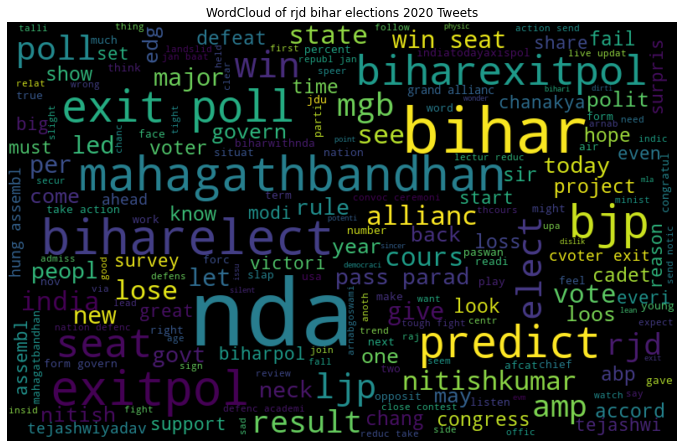

In [64]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of NDA bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**




In [66]:
from textblob import TextBlob

In [67]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

279

In [68]:
df1['Processed_Tweet']

1      [hope, nda, govern, rule, bihar, expect, seat,...
2      [cant, anyth, dont, young, blood, india, watch...
3      [worri, nda, win, biharelect, biharwithnda, bi...
4      [alma, mater, physic, near, citi, yet, far, co...
6                 [poll, predict, upa, nda, rest, other]
                             ...                        
364    [fine, gentlemen, cours, walk, quarter, deck, ...
367    [predict, biharelect, nda, bjp, mahagathbandha...
368                                   [pleas, vote, nda]
369    [great, show, nda, pass, parad, best, wish, yo...
370               [vote, bjp, biharelect, pmoindia, nda]
Name: Processed_Tweet, Length: 279, dtype: object



```
**# Classifying tweets as neutral, positive, negative**
```




In [69]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 98
Negative Tweets: 38
Neutral Tweets 143


In [70]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.0,0.756,0.244,0.4404
1,0.0,1.000,0.000,0.0000
2,0.0,0.568,0.432,0.5859
3,0.0,1.000,0.000,0.0000
4,0.0,1.000,0.000,0.0000
...,...,...,...,...
274,0.0,0.847,0.153,0.2023
275,0.0,1.000,0.000,0.0000
276,0.0,1.000,0.000,0.0000
277,0.0,0.389,0.611,0.9001


In [72]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,0.756,0.244,0.4404,Positive
1,0.0,1.000,0.000,0.0000,Neutral
2,0.0,0.568,0.432,0.5859,Positive
3,0.0,1.000,0.000,0.0000,Neutral
4,0.0,1.000,0.000,0.0000,Neutral


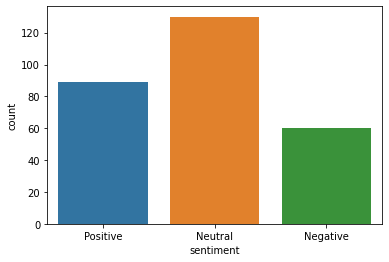

In [73]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)